In [1]:
import pandas as pd
import glob
import re
from pathlib import Path

# Get all CSV files in the root directory
csv_files = glob.glob('/workspaces/doodlebot-line-array-analysis/lines/*.csv')

# Create a list to store the data
data_list = []

# Pattern to extract robot name and calibration status
# Format: sensor_data_{robot_name}_{calibrated/uncalibrated}_{timestamp}.csv
pattern = r'sensor_data_([^_]+)_(calibrated|uncalibrated)_'

for csv_file in csv_files:
    # Extract filename from path
    filename = Path(csv_file).name
    
    # Extract robot name and calibration status using regex
    match = re.search(pattern, filename)
    
    if match:
        robot_name = match.group(1)
        calibration_status = match.group(2)
        calibrated = calibration_status == 'calibrated'
        
        # Read the CSV file, skipping the first line (which contains robot_name,___)
        df = pd.read_csv(csv_file, skiprows=1)
        
        # Add metadata columns
        df['robot_name'] = robot_name
        df['calibrated'] = calibrated
        df['source_file'] = filename
        
        data_list.append(df)
        
        print(f"Loaded: {filename}")
        print(f"  Robot: {robot_name}, Calibrated: {calibrated}")

# Combine all dataframes
if data_list:
    combined_df = pd.concat(data_list, ignore_index=True)
    print(f"\nTotal rows loaded: {len(combined_df)}")
    print(f"Robots: {combined_df['robot_name'].unique()}")
    print(f"\nFirst few rows:")
    print(combined_df.head())
else:
    print("No CSV files found matching the pattern")

Loaded: sensor_data_doughnut_uncalibrated_2025-12-04T22_39_30.847Z.csv
  Robot: doughnut, Calibrated: False
Loaded: sensor_data_cheesecake_uncalibrated_2025-12-04T22_44_09.484Z.csv
  Robot: cheesecake, Calibrated: False
Loaded: sensor_data_brownie_uncalibrated_2025-12-04T22_41_54.611Z.csv
  Robot: brownie, Calibrated: False
Loaded: sensor_data_tiramisu_uncalibrated_2025-12-04T22_36_15.307Z.csv
  Robot: tiramisu, Calibrated: False
Loaded: sensor_data_cheesecake_calibrated_2025-12-04T22_44_59.452Z.csv
  Robot: cheesecake, Calibrated: True
Loaded: sensor_data_doughnut_calibrated_2025-12-04T22_40_34.508Z.csv
  Robot: doughnut, Calibrated: True
Loaded: sensor_data_brownie_calibrated_2025-12-04T22_42_52.559Z.csv
  Robot: brownie, Calibrated: True
Loaded: sensor_data_biscuit_calibrated_2025-12-04T22_34_43.489Z.csv
  Robot: biscuit, Calibrated: True
Loaded: sensor_data_tiramisu_calibrated_2025-12-04T22_38_25.375Z.csv
  Robot: tiramisu, Calibrated: True

Total rows loaded: 3693
Robots: ['doughn

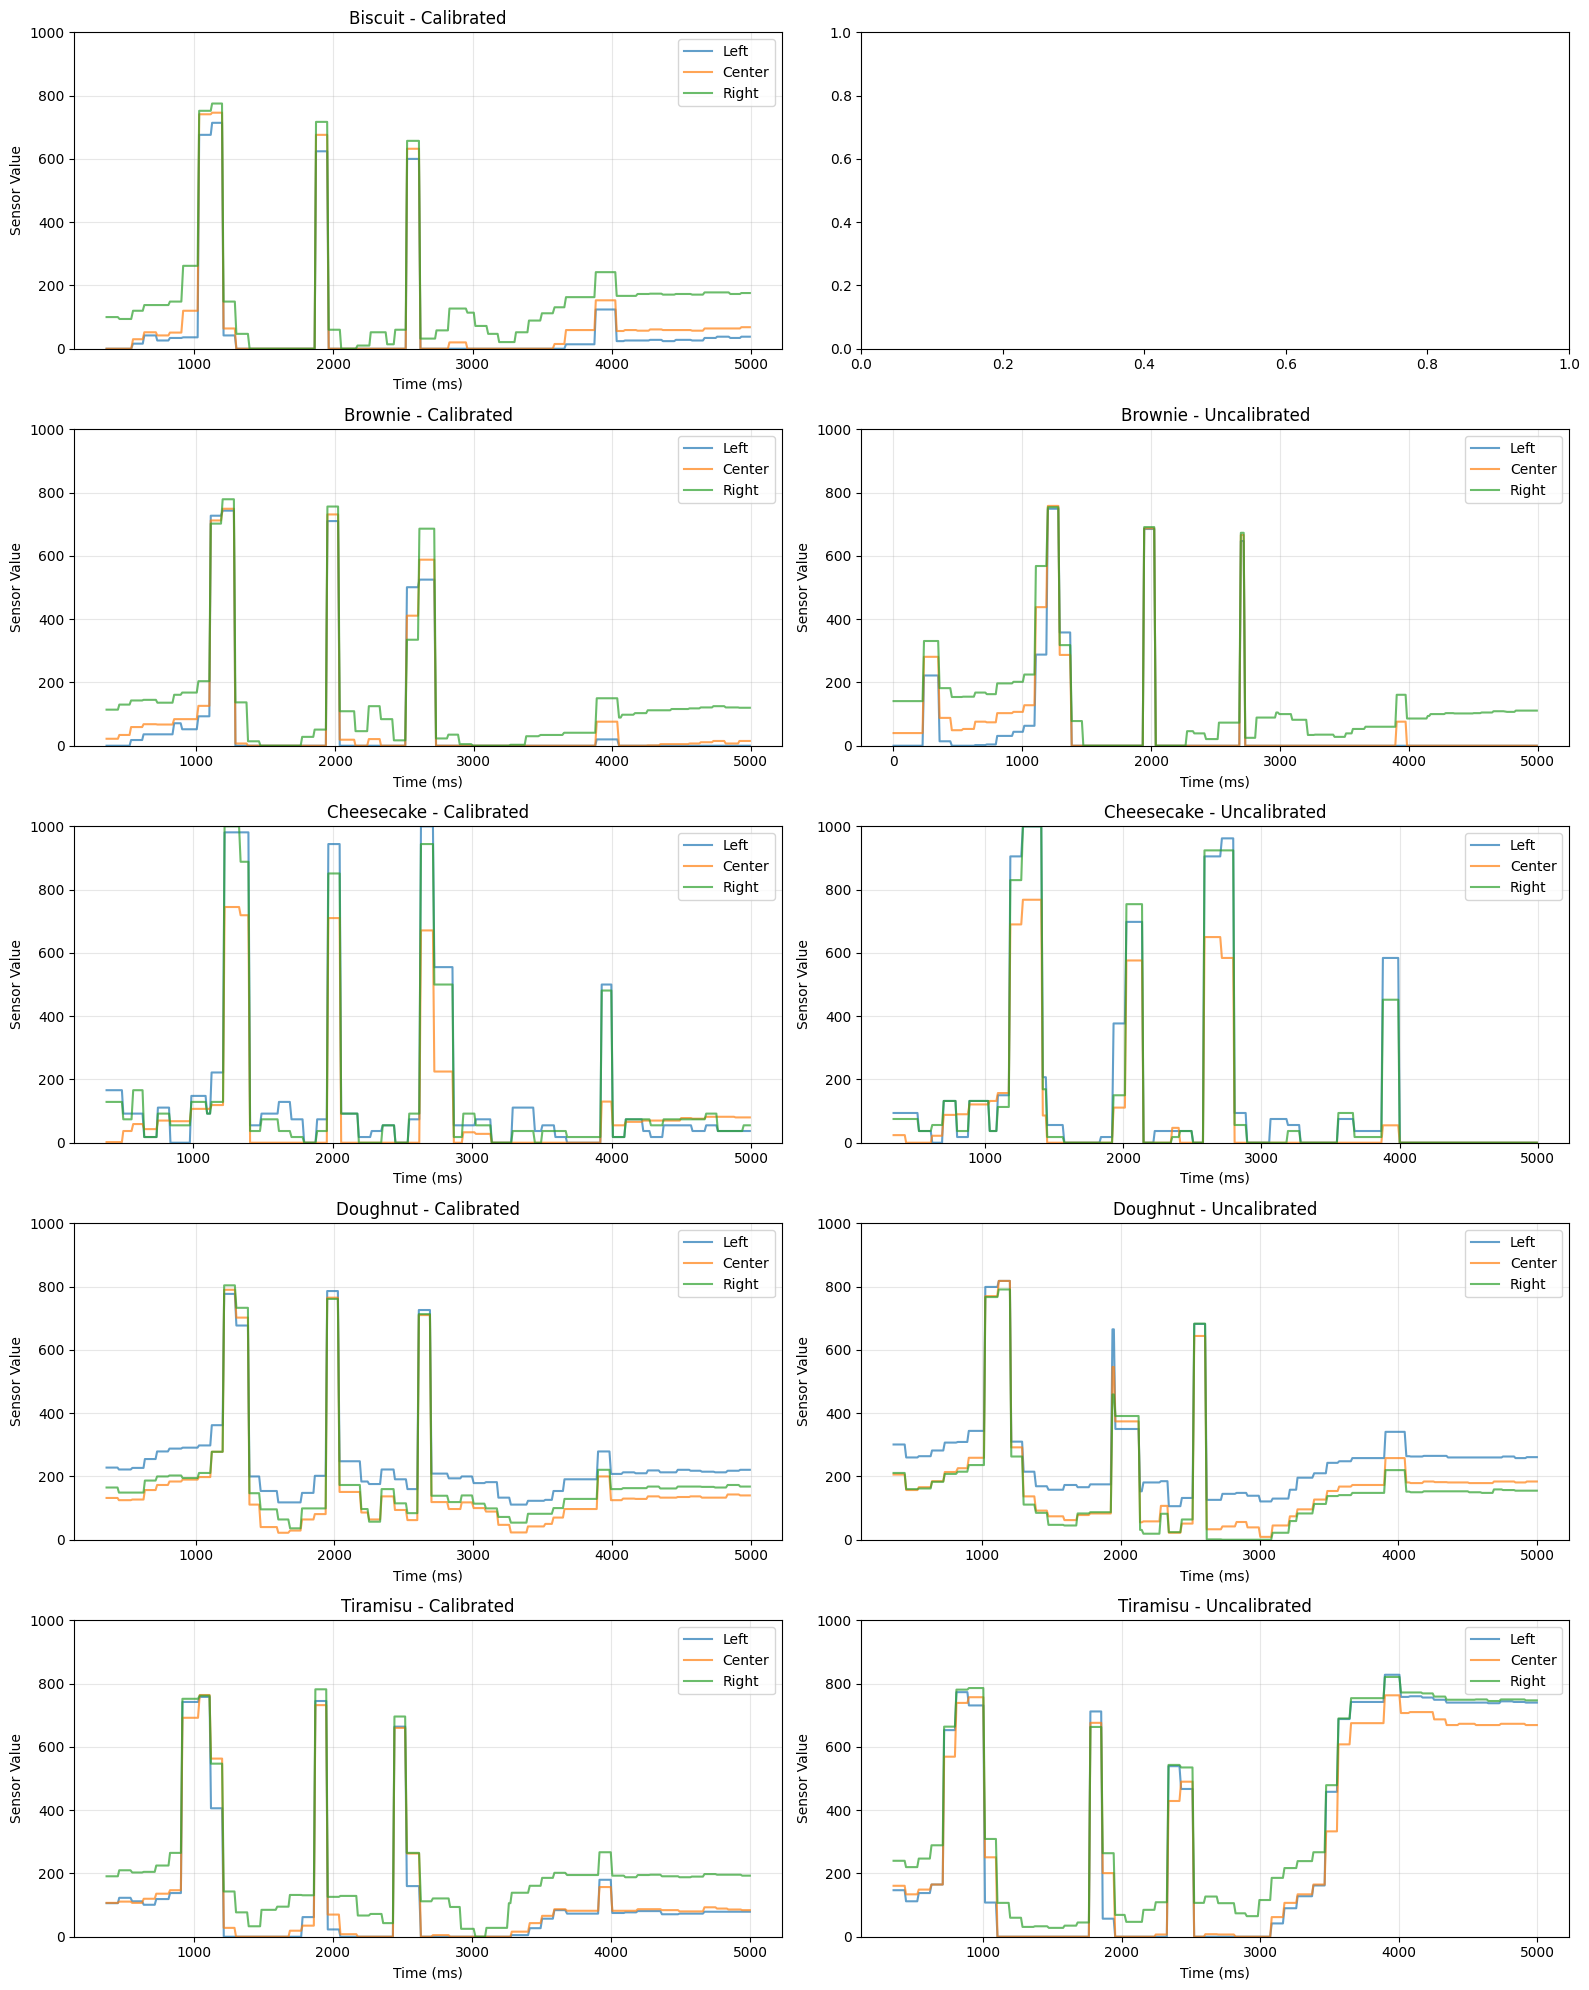

In [2]:
import matplotlib.pyplot as plt

# Get unique robots and calibration statuses
robots = combined_df['robot_name'].unique()

# Create a figure with subplots for each robot
fig, axes = plt.subplots(len(robots), 2, figsize=(16, 4 * len(robots)))

# Handle case where there's only one robot
if len(robots) == 1:
    axes = axes.reshape(1, -1)

for idx, robot in enumerate(sorted(robots)):
    # Plot calibrated data
    calibrated_data = combined_df[(combined_df['robot_name'] == robot) & (combined_df['calibrated'] == True)]
    if not calibrated_data.empty:
        ax = axes[idx, 0]
        ax.plot(calibrated_data['time_ms'], calibrated_data['left'], label='Left', alpha=0.7)
        ax.plot(calibrated_data['time_ms'], calibrated_data['center'], label='Center', alpha=0.7)
        ax.plot(calibrated_data['time_ms'], calibrated_data['right'], label='Right', alpha=0.7)
        ax.set_title(f'{robot.capitalize()} - Calibrated')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Sensor Value')
        ax.set_ylim(0, 1000)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Plot uncalibrated data
    uncalibrated_data = combined_df[(combined_df['robot_name'] == robot) & (combined_df['calibrated'] == False)]
    if not uncalibrated_data.empty:
        ax = axes[idx, 1]
        ax.plot(uncalibrated_data['time_ms'], uncalibrated_data['left'], label='Left', alpha=0.7)
        ax.plot(uncalibrated_data['time_ms'], uncalibrated_data['center'], label='Center', alpha=0.7)
        ax.plot(uncalibrated_data['time_ms'], uncalibrated_data['right'], label='Right', alpha=0.7)
        ax.set_title(f'{robot.capitalize()} - Uncalibrated')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Sensor Value')
        ax.set_ylim(0, 1000)
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()